In [2]:
import skopi as sk
import psana
import numpy as np
import h5py as h5
import time, os, glob

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
from matplotlib import cm

In [5]:
# input files
base_dir = "/cds/home/a/apeck/skopi/examples/input"
beam_file = os.path.join(base_dir, "beam/amo86615.beam")
pdb_file = os.path.join(base_dir, "pdb/3iyf.pdb")

# generate beam object
beam = sk.Beam(beam_file)
increase_factor = 1e3
beam.set_photons_per_pulse(increase_factor*beam.get_photons_per_pulse())

# non LCLS detector
n_pixels, det_size, det_dist = 1024, 0.08, 0.2
det = sk.SimpleSquareDetector(n_pixels, det_size, det_dist, beam=beam) 


In [65]:
pdb_list = glob.glob("/cds/home/a/apeck/exafel/skopi_figs/benchmarking/pdbs/*pdb")

In [66]:
n_shots = 100

n_atoms = np.zeros(len(pdb_list))
time_readpdb = np.zeros(len(pdb_list))
time_setup = np.zeros(len(pdb_list))
time_calcimg = np.zeros(len(pdb_list))

for i,pdb_file in enumerate(pdb_list):   
    print("PDB: %s" %pdb_file)
    
    start_time = time.time()
    particle = sk.Particle()
    particle.read_pdb(pdb_file, ff='WK')
    time_readpdb[i] = (time.time() - start_time)/60.0
    n_atoms[i] = particle.atom_pos.shape[0]
    
    start_time = time.time()
    exp = sk.SPIExperiment(det, beam, particle)
    time_setup[i] = (time.time() - start_time)/60.0
    
    start_time = time.time()
    for ns in range(n_shots):
        img = exp.generate_image()
    time_calcimg[i] = (time.time() - start_time)/60.0

PDB: /cds/home/a/apeck/exafel/skopi_figs/benchmarking/pdbs/3cc4.pdb
Unknown element or wrong line: 
 HETATM91027 MG    MG A8051     119.200 139.732  53.588  1.00 81.99          MG  

Unknown element or wrong line: 
 HETATM91029 SR    SR A8929      97.954 117.598  81.982  1.00131.93          SR  

Unknown element or wrong line: 
 HETATM91030 SR    SR A8930     117.770 136.484  51.137  1.00116.79          SR  

Unknown element or wrong line: 
 HETATM91031 SR    SR A8977     118.154 137.171  45.002  1.00172.88          SR  

Unknown element or wrong line: 
 HETATM91032 MG    MG B8042      69.571 173.847 136.214  1.00 50.29          MG  

Unknown element or wrong line: 
 HETATM91033 NA    NA B8552      66.535 145.267 102.035  1.00 56.83          NA  

Unknown element or wrong line: 
 HETATM91035 SR    SR B8950      49.577 123.900 109.966  1.00108.37          SR  

Unknown element or wrong line: 
 HETATM91036 SR    SR B8987      34.574 153.320 139.159  1.00200.00          SR  

Unknown elem

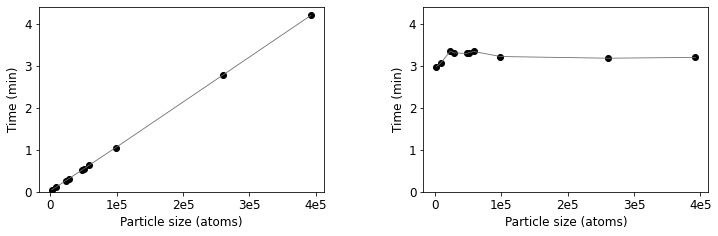

In [90]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,3.4))

indices = np.argsort(n_atoms)
for ax,tt in zip([ax1,ax2],[time_setup, time_calcimg]):
    ax.plot(n_atoms[indices], tt[indices], c='dimgrey', linewidth=0.8)
    ax.scatter(n_atoms, tt, c='black')
    
    ax.set_xlabel("Particle size (atoms)", fontsize=12)
    ax.set_xticks(range(0,500000,100000))
    ax.set_xticklabels(["0", "1e5", "2e5", "3e5", "4e5"], fontsize=12)

    ax.set_ylabel("Time (min)", fontsize=12)
    ax.set_yticks(np.arange(5))
    ax.set_yticklabels(np.arange(5), fontsize=12)
    ax.set_ylim(0,4.4)

f.subplots_adjust(wspace=0.35)
f.savefig("/cds/home/a/apeck/exafel/skopi_figs/benchmarking/vs_particlesize.png", dpi=300, bbox_inches='tight')